Importando as bibliotecas

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Selecionando as colunas a serem utilizadas

In [6]:
use_columns = ["V0001", "Q074"]

Lendo a base de dados

In [7]:
pns = pd.read_csv("pns2019.csv", usecols=use_columns)

In [8]:
pns

,V0001,Q074
0,11,2.0
1,11,NaN
2,11,NaN
3,11,NaN
4,11,NaN
...,...,...
293721,53,NaN
293722,53,NaN
293723,53,NaN
293724,53,NaN


In [9]:
pns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293726 entries, 0 to 293725
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V0001   293726 non-null  int64  
 1   Q074    90846 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 4.5 MB


In [10]:
pns["Q074"].value_counts()

2.0    86379
1.0     4467
Name: Q074, dtype: int64

In [11]:
pns['Q074'] = pd.to_numeric(pns['Q074'], errors='coerce')

In [12]:
pns = pns.dropna(subset=['Q074'])

In [13]:
pns

,V0001,Q074
0,11,2.0
9,11,2.0
10,11,2.0
18,11,2.0
19,11,2.0
...,...,...
293709,53,2.0
293712,53,2.0
293713,53,2.0
293718,53,2.0


In [14]:
mapeamento_estados = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [15]:
pns['V0001'] = pns['V0001'].map(mapeamento_estados)

C:\Users\dokim\AppData\Local\Temp/ipykernel_5492/271576639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pns['V0001'] = pns['V0001'].map(mapeamento_estados)


In [16]:
contagem_estados = pns.groupby(['V0001', 'Q074']).size().unstack(fill_value=0)

In [17]:
contagem_estados

Q074,1.0,2.0
V0001,,
Acre,93,2287
Alagoas,116,2871
Amapá,93,1461
Amazonas,151,3328
Bahia,117,3542
Ceará,200,4065
Distrito Federal,120,2245
Espírito Santo,231,3310
Goiás,146,2556


[]

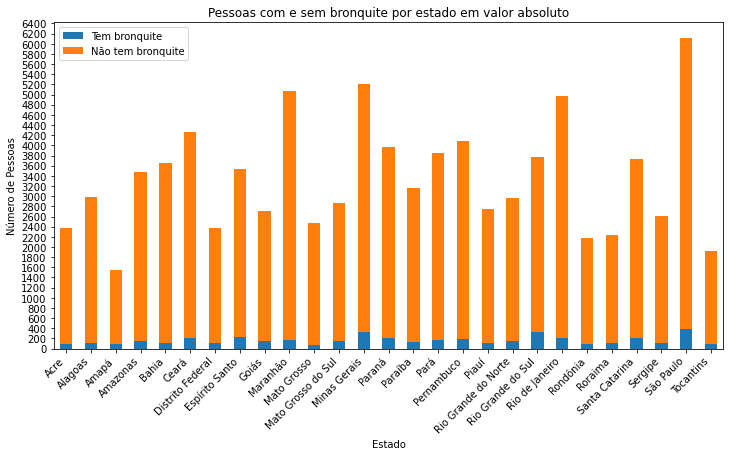

In [18]:
contagem_estados.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Estado')
plt.ylabel('Número de Pessoas')
plt.title('Pessoas com e sem bronquite por estado em valor absoluto')
plt.legend(['Tem bronquite', 'Não tem bronquite'])
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, 7000, step=200))
plt.savefig('Graficos/grafico_bronquite_absoluto.png', dpi=300, bbox_inches='tight')
plt.plot()

In [19]:
BS = contagem_estados[1.0].values.sum()
BN = contagem_estados[2.0].values.sum()
QTotal = BS + BN

In [20]:
i = 0
contagem_estados['Possui bronquite(%)'] = 0
contagem_estados['Nao possui bronquite(%)'] = 0
for index, row in contagem_estados.iterrows():
    contagem_estados.iat[i,2] = (row[1.0]/QTotal) * 100
    contagem_estados.iat[i,3] = (row[2.0]/QTotal) * 100
    i += 1

In [21]:
contagem_estados

Q074,1.0,2.0,Possui bronquite(%),Nao possui bronquite(%)
V0001,,,,
Acre,93,2287,0.102371,2.517447
Alagoas,116,2871,0.127689,3.160293
Amapá,93,1461,0.102371,1.608216
Amazonas,151,3328,0.166215,3.663342
Bahia,117,3542,0.128789,3.898906
Ceará,200,4065,0.220153,4.474605
Distrito Federal,120,2245,0.132092,2.471215
Espírito Santo,231,3310,0.254276,3.643529
Goiás,146,2556,0.160712,2.813553


[]

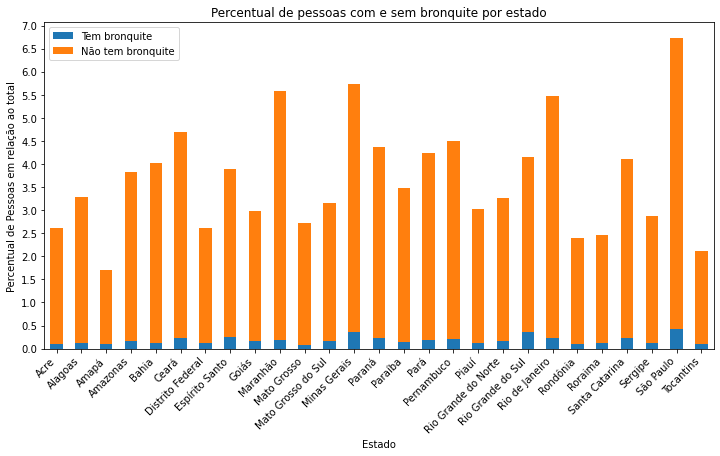

In [22]:
contagem_estados[['Possui bronquite(%)','Nao possui bronquite(%)']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Estado')
plt.ylabel('Percentual de Pessoas em relação ao total')
plt.title('Percentual de pessoas com e sem bronquite por estado')
plt.legend(['Tem bronquite', 'Não tem bronquite'])
plt.xticks(rotation=45, ha='right')
plt.yticks(ticks=np.arange(0,8, step=0.5))
plt.savefig('Graficos/grafico_bronquite_relativo.png', dpi=300, bbox_inches='tight')
plt.plot()

In [23]:
mapeamento_regiao = {
    'Rondônia': 'Norte',
    'Acre': 'Norte',
    'Amazonas': 'Norte',
    'Roraima': 'Norte',
    'Pará': 'Norte',
    'Amapá': 'Norte',
    'Tocantins': 'Norte',
    'Maranhão': 'Nordeste',
    'Piauí': 'Nordeste',
    'Ceará': 'Nordeste',
    'Rio Grande do Norte': 'Nordeste',
    'Paraíba': 'Nordeste',
    'Pernambuco': 'Nordeste',
    'Alagoas': 'Nordeste',
    'Sergipe': 'Nordeste',
    'Bahia': 'Nordeste',
    'Mato Grosso do Sul': 'Centro-Oeste',
    'Mato Grosso': 'Centro-Oeste',
    'Goiás': 'Centro-Oeste',
    'Distrito Federal': 'Centro-Oeste',
    'Minas Gerais': 'Sudeste',
    'Espírito Santo': 'Sudeste',
    'Rio de Janeiro': 'Sudeste',
    'São Paulo': 'Sudeste',
    'Paraná': 'Sul',
    'Santa Catarina': 'Sul',
    'Rio Grande do Sul': 'Sul'
}

In [24]:
pns['V0001'] = pns['V0001'].map(mapeamento_regiao)

C:\Users\dokim\AppData\Local\Temp/ipykernel_5492/128373297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pns['V0001'] = pns['V0001'].map(mapeamento_regiao)


In [25]:
contagem_regiao = pns.groupby(['V0001', 'Q074']).size().unstack(fill_value=0)

In [26]:
contagem_regiao

Q074,1.0,2.0
V0001,,
Centro-Oeste,480,9918
Nordeste,1319,30225
Norte,785,16817
Sudeste,1153,18677
Sul,730,10742


[]

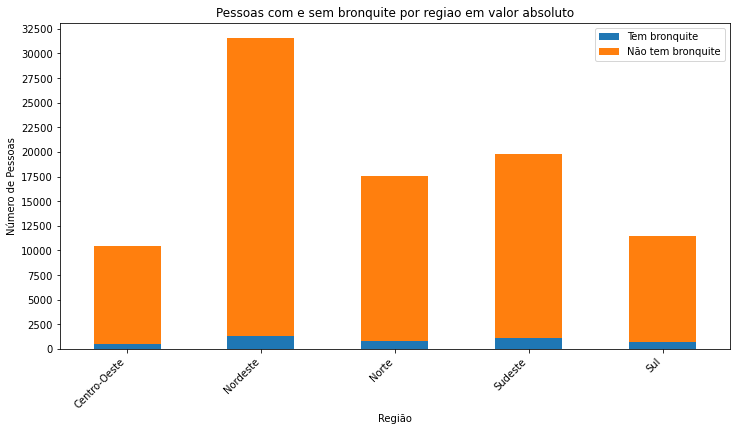

In [27]:
contagem_regiao.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Região')
plt.ylabel('Número de Pessoas')
plt.title('Pessoas com e sem bronquite por regiao em valor absoluto')
plt.legend(['Tem bronquite', 'Não tem bronquite'])
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, 35000, 2500))
plt.savefig('Graficos/grafico_regional_bronquite_absoluto.png', dpi=300, bbox_inches='tight')
plt.plot()

In [28]:
BS = contagem_regiao[1.0].values.sum()
BN = contagem_regiao[2.0].values.sum()
QTotal = BS + BN

In [29]:
i = 0
contagem_regiao['Possui bronquite(%)'] = 0
contagem_regiao['Nao possui bronquite(%)'] = 0
for index, row in contagem_regiao.iterrows():
    contagem_regiao.iat[i,2] = (row[1.0]/QTotal) * 100
    contagem_regiao.iat[i,3] = (row[2.0]/QTotal) * 100
    i += 1

[]

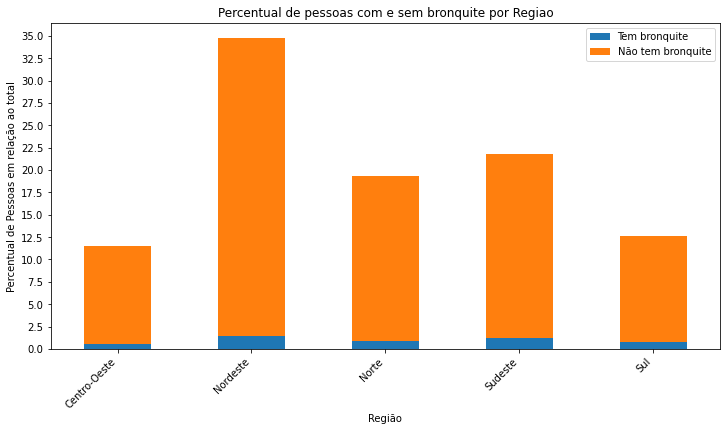

In [30]:
contagem_regiao[['Possui bronquite(%)','Nao possui bronquite(%)']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Região')
plt.ylabel('Percentual de Pessoas em relação ao total')
plt.title('Percentual de pessoas com e sem bronquite por Regiao')
plt.legend(['Tem bronquite', 'Não tem bronquite'])
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, 40, 2.5))
plt.savefig('Graficos/grafico_regional_bronquite_relativo.png', dpi=300, bbox_inches='tight')
plt.plot()

# Análise exploratória

Amostra das primeiras linhas da base

In [32]:
pns.head()

,V0001,Q074
0,Norte,2.0
9,Norte,2.0
10,Norte,2.0
18,Norte,2.0
19,Norte,2.0


Informações gerais sobre as colunas e tipos de dados

In [33]:
pns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90846 entries, 0 to 293720
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0001   90846 non-null  object 
 1   Q074    90846 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.1+ MB


Estatísticas descritivas da coluna numérica

In [34]:
pns.describe()

,Q074
count,90846.000000
mean,1.950829
std,0.216226
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


Contagem de valores ausentes

In [35]:
pns.isnull().sum()

V0001    0
Q074     0
dtype: int64

Contagem de valores duplicados

In [36]:
pns.duplicated().sum()

90836